<a href="https://colab.research.google.com/github/zahramoradi1998m/liquidity-risk-prediction-deep-learning/blob/main/Sale_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.layers import LSTM,Dropout,Flatten,BatchNormalization,SimpleRNN ,Conv1D,MaxPooling1D,GlobalAveragePooling1D,GlobalMaxPooling1D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import torch
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.models import load_model
from keras.utils.vis_utils import plot_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from keras import backend as K
from tensorflow import keras
from keras.engine import sequential
from tensorflow.python.framework import ops
from sklearn.model_selection import KFold, StratifiedKFold


In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [ ]:
#وارد کردن دیتاست
dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/mar/Sodur.xlsx',usecols=[0,3])
dataset.head()

,TotalGhestAmount,BeginDateKey
0,4857860,13950925
1,4857860,13950925
2,4504880,13950925
3,4504880,13950925
4,4504880,13950925


In [ ]:
dataset=dataset.sort_values(by=['BeginDateKey'])
dataset=dataset.groupby(['BeginDateKey']).sum()

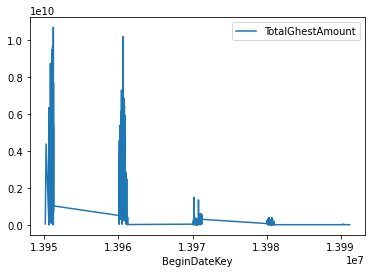

In [ ]:
from matplotlib import pyplot
dataset.plot()
pyplot.show()

In [ ]:
dataset.head()

,TotalGhestAmount
BeginDateKey,
13950123,51799947
13950230,4373474480
13950609,36921608
13950610,1452409257
13950611,466078560


In [ ]:
scaler = MinMaxScaler()
dataset1 = scaler.fit_transform(dataset)

In [ ]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

look_back =9
X, Y = create_dataset(dataset1, look_back)
XX, testX, YY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)
#kfold

from sklearn.model_selection import KFold, StratifiedKFold

cv = KFold(n_splits=10, random_state=1, shuffle=True)

i = 0
for train_index, test_index in cv.split(XX):
  print("loop:", i)
  if i == 6:
    print( "TRAIN:", train_index, "TEST:", test_index)
    break
  else:
    i+=1

trainX = XX[train_index]
trainY = YY[train_index]
trainY=trainY.reshape(-1,1)

validX = XX[test_index]
validY = YY[test_index]
validY=validY.reshape(-1,1)

loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
TRAIN: [  0   1   2   3   4   5   6   7   9  10  11  12  13  14  15  16  17  18
  19  20  22  23  25  26  27  29  30  31  34  36  37  38  39  40  41  42
  43  46  47  49  51  52  53  54  56  57  58  59  60  61  62  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  80  81  82  85  86  87
  88  89  90  91  92  93  94  95  96  97  98 100 101 102 103 104 105 106
 107 110 111 112 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 157 158 159 160 161 162 163 164 165
 166 167 168 170 171 172 173 174 175 176 178 179 180 181 182 183 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 200 201 202 203 204 205
 206 207 208 209 210 212 213 214 215 216 217 218 220 221 223 224 225 226
 227 228 229 230 231 232 233 235 236 237 238 239 240 241 242 243 244 245
 246 247 249 250 251 252 253 254 255 256 257 258 259 260 261 

In [ ]:
trainX1 = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
validX1 = np.reshape(validX, (validX.shape[0], 1, validX.shape[1]))
testX1 = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# **Select time step**

In [ ]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

z=[]
for i in range(1,100):
  look_back =i
  X, Y = create_dataset(dataset1, look_back)
  XX, testX, YY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)
  cv = KFold(n_splits=10, random_state=1, shuffle=True)
  i = 0
  for train_index, test_index in cv.split(XX):
    print("loop:", i)
    if i == 6:
      print( "TRAIN:", train_index, "TEST:", test_index)
      break
    else:
      i+=1
  trainX = XX[train_index]
  trainY = YY[train_index]
  trainY=trainY.reshape(-1,1)

  validX = XX[test_index]
  validY = YY[test_index]
  validY=validY.reshape(-1,1)
  f=LinearRegression()
  f.fit(trainX, trainY)
  ols_testPredicted=f.predict(testX)
  ols_testR2 = r2_score(testY, ols_testPredicted)
  z.append(ols_testR2)

loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
TRAIN: [  0   1   2   3   4   5   6   7   9  10  11  12  13  14  15  16  17  18
  19  20  22  23  24  25  26  27  29  30  31  34  36  37  38  39  40  41
  42  43  46  47  49  51  52  53  54  56  57  58  59  60  61  62  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  80  81  82  85  86
  87  88  89  90  91  92  93  94  95  96  97  98 100 101 102 103 104 105
 106 107 110 111 112 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 157 159 160 161 162 163 164 165
 166 167 168 170 171 172 173 174 175 176 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 200 201 202 203 204
 205 206 207 208 209 210 212 213 214 215 216 217 218 220 221 223 224 225
 226 227 228 229 230 231 232 233 235 236 237 238 239 240 241 242 243 244
 245 246 247 249 250 251 252 253 254 255 256 257 258 259 260 

# **mlp**

In [ ]:
from keras.regularizers import l2
MLP_model=Sequential()
MLP_model.add(Input(shape=(trainX.shape[1],)))
MLP_model.add(Dense(14, kernel_initializer= 'normal'  ,activation='tanh'))
#MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(8, kernel_initializer= 'normal' , activation='relu'))
#MLP_model.add(Dropout(0.2))
MLP_model.add(Dense(1, kernel_initializer= 'normal'))


MLP_model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor= 'val_accuracy', verbose=0, mode= 'max' )
callbacks_list = [checkpoint]
MLP_model.fit(trainX, trainY, validation_data=(validX,validY), epochs=100, batch_size=10, callbacks=callbacks_list, verbose=2)


Epoch 1/100
52/52 - 1s - loss: 0.0469 - val_loss: 0.0154 - 704ms/epoch - 14ms/step
Epoch 2/100
52/52 - 0s - loss: 0.0258 - val_loss: 0.0141 - 155ms/epoch - 3ms/step
Epoch 3/100
52/52 - 0s - loss: 0.0216 - val_loss: 0.0119 - 152ms/epoch - 3ms/step
Epoch 4/100
52/52 - 0s - loss: 0.0198 - val_loss: 0.0101 - 129ms/epoch - 2ms/step
Epoch 5/100
52/52 - 0s - loss: 0.0197 - val_loss: 0.0105 - 157ms/epoch - 3ms/step
Epoch 6/100
52/52 - 0s - loss: 0.0194 - val_loss: 0.0121 - 157ms/epoch - 3ms/step
Epoch 7/100
52/52 - 0s - loss: 0.0192 - val_loss: 0.0108 - 140ms/epoch - 3ms/step
Epoch 8/100
52/52 - 0s - loss: 0.0197 - val_loss: 0.0108 - 167ms/epoch - 3ms/step
Epoch 9/100
52/52 - 0s - loss: 0.0196 - val_loss: 0.0113 - 157ms/epoch - 3ms/step
Epoch 10/100
52/52 - 0s - loss: 0.0190 - val_loss: 0.0110 - 164ms/epoch - 3ms/step
Epoch 11/100
52/52 - 0s - loss: 0.0190 - val_loss: 0.0121 - 178ms/epoch - 3ms/step
Epoch 12/100
52/52 - 0s - loss: 0.0190 - val_loss: 0.0114 - 148ms/epoch - 3ms/step
Epoch 13/100

In [ ]:
#MLP_model.save('/content/drive/MyDrive/Colab Notebooks/mar/MLP_models2new.h5')

In [ ]:
MLP_model = load_model('/content/drive/MyDrive/Colab Notebooks/mar/MLP_models2new.h5')

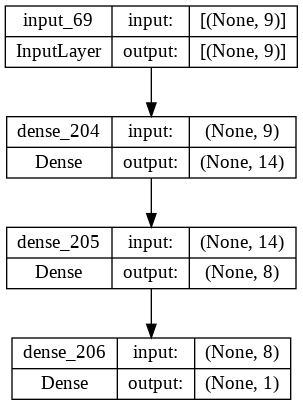

In [ ]:
plot_model(MLP_model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
MLP_trainPredicted=MLP_model.predict(trainX) #30
MLP_trainMSE = mean_squared_error(trainY, MLP_trainPredicted)
MLP_trainMAE=mean_absolute_error(trainY,MLP_trainPredicted)
print( 'Train Score: %.4f MSE (%.4f RMSE)' % (MLP_trainMSE,math.sqrt(MLP_trainMSE)))
print( 'Train Score: %.4f absolute' % (MLP_trainMAE))
ols_trainR2 = r2_score(trainY, MLP_trainPredicted)
print( 'Train Score: %.2f r2' % (ols_trainR2))

MLP_testPredicted=MLP_model.predict(testX)
MLP_testMSE = mean_squared_error(testY, MLP_testPredicted)
MLP_testMAE=mean_absolute_error(testY, MLP_testPredicted)
print( 'Test Score: %.4f MSE (%.4f RMSE)' % (MLP_testMSE,math.sqrt(MLP_testMSE)))
print( 'Test Score: %.4f absolute' % (MLP_testMAE))

ols_testR2 = r2_score(testY, MLP_testPredicted)
print( 'test Score: %.3f r2' % (ols_testR2))

17/17 [==============================] - 1s 3ms/step
Train Score: 0.0181 MSE (0.1345 RMSE)
Train Score: 0.0806 absolute
Train Score: 0.50 r2
8/8 [==============================] - 0s 3ms/step
Test Score: 0.0159 MSE (0.1259 RMSE)
Test Score: 0.0778 absolute
test Score: 0.583 r2


# **RNN**

In [ ]:
RNN_model= Sequential()
RNN_model.add(SimpleRNN(7,activation='relu', input_shape=(1,trainX1.shape[2]),return_sequences=True))
RNN_model.add(SimpleRNN(3,activation='relu'))  #RNN_model.add(Dropout(0.2))
  #RNN_model.add(Dropout(0.2))
  #RNN_model.add(Flatten())
  #RNN_model.add(Dense(15, kernel_initializer= 'normal' , activation= 'linear' ))
  #RNN_model.add(Dropout(0.2))
RNN_model.add(Dense(1))
RNN_model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor= 'val_accuracy', verbose=0, mode= 'max' )
callbacks_list = [checkpoint]
RNN_model.fit(trainX1, trainY, validation_data=(validX1,validY), epochs=100, batch_size=10, callbacks=callbacks_list, verbose=2)

Epoch 1/100
52/52 - 2s - loss: 0.0825 - val_loss: 0.0232 - 2s/epoch - 36ms/step
Epoch 2/100
52/52 - 0s - loss: 0.0347 - val_loss: 0.0138 - 156ms/epoch - 3ms/step
Epoch 3/100
52/52 - 0s - loss: 0.0235 - val_loss: 0.0117 - 157ms/epoch - 3ms/step
Epoch 4/100
52/52 - 0s - loss: 0.0208 - val_loss: 0.0115 - 154ms/epoch - 3ms/step
Epoch 5/100
52/52 - 0s - loss: 0.0197 - val_loss: 0.0114 - 159ms/epoch - 3ms/step
Epoch 6/100
52/52 - 0s - loss: 0.0193 - val_loss: 0.0123 - 184ms/epoch - 4ms/step
Epoch 7/100
52/52 - 0s - loss: 0.0189 - val_loss: 0.0113 - 153ms/epoch - 3ms/step
Epoch 8/100
52/52 - 0s - loss: 0.0185 - val_loss: 0.0114 - 171ms/epoch - 3ms/step
Epoch 9/100
52/52 - 0s - loss: 0.0183 - val_loss: 0.0107 - 155ms/epoch - 3ms/step
Epoch 10/100
52/52 - 0s - loss: 0.0181 - val_loss: 0.0113 - 153ms/epoch - 3ms/step
Epoch 11/100
52/52 - 0s - loss: 0.0179 - val_loss: 0.0111 - 160ms/epoch - 3ms/step
Epoch 12/100
52/52 - 0s - loss: 0.0178 - val_loss: 0.0112 - 180ms/epoch - 3ms/step
Epoch 13/100
52

In [ ]:
#RNN_model.save('/content/drive/MyDrive/Colab Notebooks/mar/RNN_models3new.h5')

In [ ]:
RNN_model = load_model('/content/drive/MyDrive/Colab Notebooks/mar/RNN_models3new.h5')

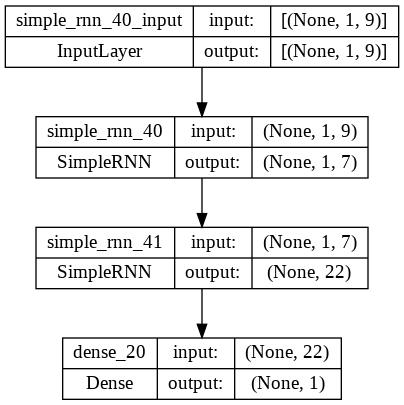

In [ ]:
plot_model(RNN_model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
RNN_trainPredicted=RNN_model.predict(trainX1)
RNN_trainMSE = mean_squared_error(trainY, RNN_trainPredicted)
RNN_trainMAE=mean_absolute_error(trainY,RNN_trainPredicted)
print( 'Train Score: %.4f MSE (%.4f RMSE)' % (RNN_trainMSE,math.sqrt(RNN_trainMSE)))
print( 'Train Score: %.4f absolute' % (RNN_trainMAE))

RNN_testPredicted=RNN_model.predict(testX1)
RNN_testMSE = mean_squared_error(testY, RNN_testPredicted)
RNN_testMAE=mean_absolute_error(testY, RNN_testPredicted)
print( 'Test Score: %.4f MSE (%.4f RMSE)' % (RNN_testMSE,math.sqrt(RNN_testMSE)))
print( 'Test Score: %.4f absolute' % (RNN_testMAE))

17/17 [==============================] - 0s 3ms/step
Train Score: 0.0136 MSE (0.1167 RMSE)
Train Score: 0.0679 absolute
8/8 [==============================] - 0s 3ms/step
Test Score: 0.0155 MSE (0.1243 RMSE)
Test Score: 0.0747 absolute


# **LSTM**

In [ ]:
LSTM_model= Sequential()
LSTM_model.add(LSTM(9,activation='relu', input_shape=(1,trainX1.shape[2]),return_sequences=True))
LSTM_model.add(LSTM(3,activation='relu'))  #LSTM_model.add(Dropout(0.2))
#LSTM_model.add(Flatten())
LSTM_model.add(Dense(1))
LSTM_model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor= 'val_accuracy', verbose=0, mode= 'max' )
callbacks_list = [checkpoint]
LSTM_model.fit(trainX1, trainY, validation_data=(validX1,validY), epochs=100, batch_size=10, callbacks=callbacks_list, verbose=2)

Epoch 1/100
52/52 - 3s - loss: 0.0439 - val_loss: 0.0172 - 3s/epoch - 53ms/step
Epoch 2/100
52/52 - 0s - loss: 0.0282 - val_loss: 0.0161 - 205ms/epoch - 4ms/step
Epoch 3/100
52/52 - 0s - loss: 0.0232 - val_loss: 0.0129 - 200ms/epoch - 4ms/step
Epoch 4/100
52/52 - 0s - loss: 0.0210 - val_loss: 0.0114 - 208ms/epoch - 4ms/step
Epoch 5/100
52/52 - 0s - loss: 0.0204 - val_loss: 0.0113 - 187ms/epoch - 4ms/step
Epoch 6/100
52/52 - 0s - loss: 0.0201 - val_loss: 0.0118 - 216ms/epoch - 4ms/step
Epoch 7/100
52/52 - 0s - loss: 0.0197 - val_loss: 0.0122 - 203ms/epoch - 4ms/step
Epoch 8/100
52/52 - 0s - loss: 0.0196 - val_loss: 0.0116 - 208ms/epoch - 4ms/step
Epoch 9/100
52/52 - 0s - loss: 0.0193 - val_loss: 0.0126 - 213ms/epoch - 4ms/step
Epoch 10/100
52/52 - 0s - loss: 0.0195 - val_loss: 0.0127 - 203ms/epoch - 4ms/step
Epoch 11/100
52/52 - 0s - loss: 0.0190 - val_loss: 0.0120 - 201ms/epoch - 4ms/step
Epoch 12/100
52/52 - 0s - loss: 0.0187 - val_loss: 0.0121 - 209ms/epoch - 4ms/step
Epoch 13/100
52

In [ ]:
#LSTM_model.save('/content/drive/MyDrive/Colab Notebooks/mar/LSTM_models4new.h5')

In [ ]:
#pd.DataFrame(LSTM_model.history.history).plot()
#plt.title( 'model loss' )
#plt.ylabel( 'loss' )
#plt.xlabel( 'epoch' )
#plt.legend([ 'train' , 'test' ], loc= 'upper left' )
#plt.show()

In [ ]:
LSTM_model =load_model('/content/drive/MyDrive/Colab Notebooks/mar/LSTM_models1new.h5')

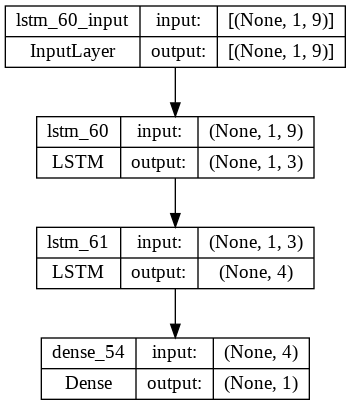

In [ ]:
plot_model(LSTM_model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
LSTM_trainPredicted=LSTM_model.predict(trainX1)
LSTM_trainMSE = mean_squared_error(trainY, LSTM_trainPredicted)
LSTM_trainMAE=mean_absolute_error(trainY,LSTM_trainPredicted)
print( 'Train Score: %.4f MSE (%.4f RMSE)' % (LSTM_trainMSE,math.sqrt(LSTM_trainMSE)))
print( 'Train Score: %.4f absolute' % (LSTM_trainMAE))

LSTM_testPredicted=LSTM_model.predict(testX1)
LSTM_testMSE = mean_squared_error(testY, LSTM_testPredicted)
LSTM_testMAE=mean_absolute_error(testY, LSTM_testPredicted)
print( 'Test Score: %.4f MSE (%.4f RMSE)' % (LSTM_testMSE,math.sqrt(LSTM_testMSE)))
print( 'Test Score: %.4f absolute' % (LSTM_testMAE))



17/17 [==============================] - 0s 2ms/step
Train Score: 0.0170 MSE (0.1306 RMSE)
Train Score: 0.0785 absolute
8/8 [==============================] - 0s 2ms/step
Test Score: 0.0153 MSE (0.1239 RMSE)
Test Score: 0.0761 absolute


# **CNN**

In [ ]:
CNN_model = Sequential()
CNN_model.add(Conv1D(8, 1, activation="relu", input_shape=(1,trainX1.shape[2]),padding="same"))
#CNN_model.add(BatchNormalization())
CNN_model.add(Conv1D(18, 1, activation="relu",padding="same"))
#CNN_model.add(MaxPooling1D(pool_size=2,padding="same"))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
CNN_model.add(GlobalMaxPooling1D())
CNN_model.add(Flatten())
#CNN_model.add(Dense(20, activation="tanh"))
#CNN_model.add(Dropout(0.2))
CNN_model.add(Dense(1))

CNN_model.compile(loss= 'mean_squared_error' , optimizer='adam')
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor= 'val_accuracy', verbose=0, mode= 'max' )
callbacks_list = [checkpoint]
CNN_model.fit(trainX1, trainY, validation_data=(validX1,validY), epochs=100, batch_size=10, callbacks=callbacks_list, verbose=2)

Epoch 1/100
52/52 - 1s - loss: 0.0246 - val_loss: 0.0102 - 759ms/epoch - 15ms/step
Epoch 2/100
52/52 - 0s - loss: 0.0205 - val_loss: 0.0103 - 133ms/epoch - 3ms/step
Epoch 3/100
52/52 - 0s - loss: 0.0193 - val_loss: 0.0108 - 142ms/epoch - 3ms/step
Epoch 4/100
52/52 - 0s - loss: 0.0189 - val_loss: 0.0106 - 151ms/epoch - 3ms/step
Epoch 5/100
52/52 - 0s - loss: 0.0185 - val_loss: 0.0108 - 133ms/epoch - 3ms/step
Epoch 6/100
52/52 - 0s - loss: 0.0182 - val_loss: 0.0115 - 143ms/epoch - 3ms/step
Epoch 7/100
52/52 - 0s - loss: 0.0181 - val_loss: 0.0103 - 158ms/epoch - 3ms/step
Epoch 8/100
52/52 - 0s - loss: 0.0178 - val_loss: 0.0108 - 136ms/epoch - 3ms/step
Epoch 9/100
52/52 - 0s - loss: 0.0178 - val_loss: 0.0115 - 145ms/epoch - 3ms/step
Epoch 10/100
52/52 - 0s - loss: 0.0174 - val_loss: 0.0107 - 155ms/epoch - 3ms/step
Epoch 11/100
52/52 - 0s - loss: 0.0175 - val_loss: 0.0103 - 135ms/epoch - 3ms/step
Epoch 12/100
52/52 - 0s - loss: 0.0174 - val_loss: 0.0108 - 146ms/epoch - 3ms/step
Epoch 13/100

In [ ]:
#CNN_model.save('/content/drive/MyDrive/Colab Notebooks/mar/CNN_models5new.h5')

In [ ]:
CNN_model =load_model('/content/drive/MyDrive/Colab Notebooks/mar/CNN_models5new.h5')

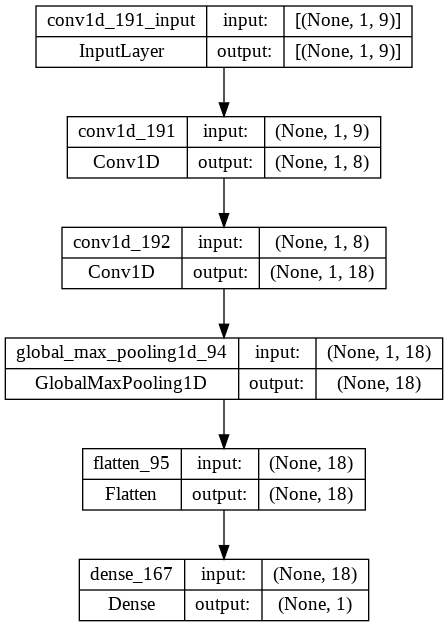

In [ ]:
plot_model(CNN_model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
CNN_trainPredicted=CNN_model.predict(trainX1)
CNN_trainMSE = mean_squared_error(trainY, CNN_trainPredicted)
CNN_trainMAE=mean_absolute_error(trainY,CNN_trainPredicted)
print( 'Train Score: %.4f MSE (%.4f RMSE)' % (CNN_trainMSE,math.sqrt(CNN_trainMSE)))
print( 'Train Score: %.4f absolute' % (CNN_trainMAE))


CNN_testPredicted=CNN_model.predict(testX1)
CNN_testMSE = mean_squared_error(testY, CNN_testPredicted)
CNN_testMAE=mean_absolute_error(testY, CNN_testPredicted)
print( 'Test Score: %.4f MSE (%.4f RMSE)' % (CNN_testMSE,math.sqrt(CNN_testMSE)))
print( 'Test Score: %.4f absolute' % (CNN_testMAE))

17/17 [==============================] - 0s 2ms/step
Train Score: 0.0133 MSE (0.1155 RMSE)
Train Score: 0.0689 absolute
8/8 [==============================] - 0s 2ms/step
Test Score: 0.0153 MSE (0.1239 RMSE)
Test Score: 0.0763 absolute


# **Plot**

In [ ]:
!pip install pygal
!pip install cairosvg
import pygal
from pygal.style import Style

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 129 kB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 2.3 MB/s 
     |████████████████████████████████| 69 kB 7.2 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.4.0-py3-none-any.whl size=88775 sha256=b9ca41274d75eed6eef8f2b7fbefd792187cef64b3385be2292cda5d9dd7d12b
  Stored in directory: /root/.cache/pip/wheels/01/a9/c0/5c05f9dd73c21f9a7716690642823cdba55594d17a9bd69daf
Successfully built cairocffi


In [ ]:

custom_style = Style(
     colors=('#0343df', '#e50000'),
     font_family='MSE',
     background='transparent',
     label_font_size=14,
 )
c = pygal.Bar(
     title="MSE",
     style=custom_style,
     y_title='MSE',
     width=1200,
     x_label_rotation=270,
)

mse=[MLP_testMSE,RNN_testMSE,LSTM_testMSE,CNN_testMSE]
INDEX=['MLP','RNN','LSTM','CNN']
c.add('MSE', mse)
c.x_labels = INDEX



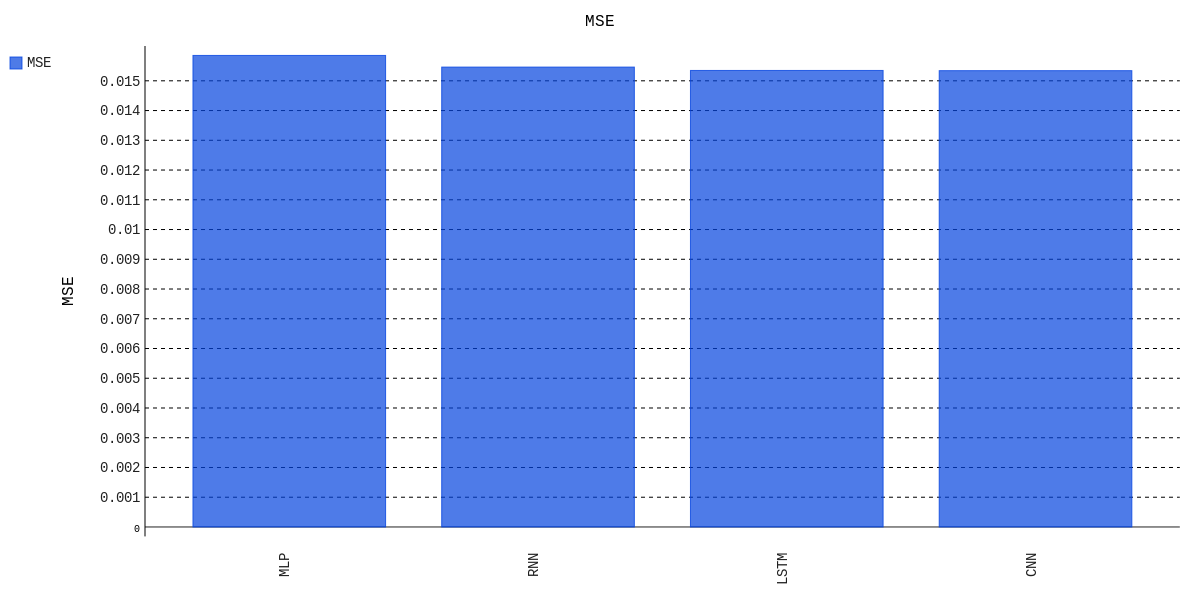

In [ ]:
c

In [ ]:

custom_style = Style(
     colors=('#e50000','#0343df'),
     font_family='MAE',
     background='transparent',
     label_font_size=14,
 )
d = pygal.Bar(
     title="MAE",
     style=custom_style,
     y_title='MAE',
     width=1200,
     x_label_rotation=270,
)

mae=[MLP_testMAE,RNN_testMAE,LSTM_testMAE,CNN_testMAE]
INDEX=['MLP','RNN','LSTM','CNN']
d.add('MAE', mae)
d.x_labels = INDEX


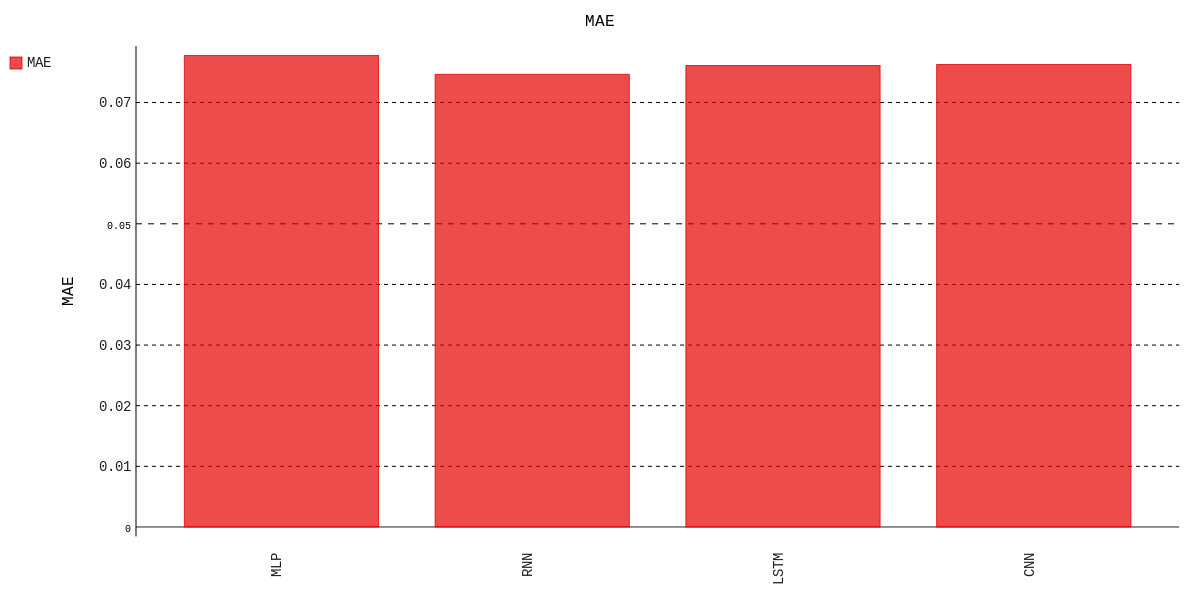

In [ ]:
d